In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loding the csv file as pandas dataframe
diamonds = pd.read_csv('G:\My Research\CSV Files\diamonds.csv')

In [3]:
# Looking at the loaded data
diamonds.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [4]:
# dropping the first column
diamonds = diamonds.drop(diamonds.columns[0],1)
# code to directly delete first column, while loding the data from csv file
# diamonds = pd.read_csv('G:\My Research\CSV Files\diamonds.csv').iloc[:,1:]

In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# checking the datatypes and null values in the data
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**From the above, we can see that there are no null values in our dataset.**

In [7]:
# if there are null values presents in the data, then we can use imputer for filling those null values
# from sklearn.preprocessing import Imputer

In [8]:
# checking for the unique values and their total counts in the dataset, 
# to get an insight about categorical and numerical variables in the dataset
for i in diamonds:
    print(diamonds[i].value_counts())

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
1.00    1558
0.90    1485
0.41    1382
0.40    1299
0.71    1294
0.50    1258
0.33    1189
0.51    1127
0.34     910
1.02     883
0.52     817
1.51     807
1.50     793
0.72     764
0.53     709
0.42     706
0.38     670
0.35     667
1.20     645
0.54     625
0.36     572
0.91     570
1.03     523
0.55     496
0.73     492
        ... 
2.58       3
2.55       3
2.63       3
1.92       2
3.04       2
2.75       2
2.80       2
4.01       2
2.68       2
3.24       1
2.67       1
3.65       1
4.00       1
3.11       1
2.64       1
4.50       1
3.50       1
2.59       1
3.02       1
3.51       1
2.65       1
3.05       1
2.71       1
3.22       1
4.13       1
2.70       1
3.67       1
5.01       1
2.77       1
3.40       1
Name: carat, Length: 273, dtype: int64
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D    

In [9]:
# defining the variables into Categorical and Numerical

**Categorical Variables :** cut, color, clarity
**Numerical Variables :** carat, depth, table, price, x, y, z

In [10]:
# defining the variables into Dependent and Independent

**Dependent Variable :** price
**Independent Variable :** carat, cut, color, clarity, depth, table, x, y, z

In [11]:
# Now we will see the distribution of variables
d_cat = diamonds[['cut', 'color', 'clarity']]
d_num = diamonds[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]

In [12]:
d_num.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


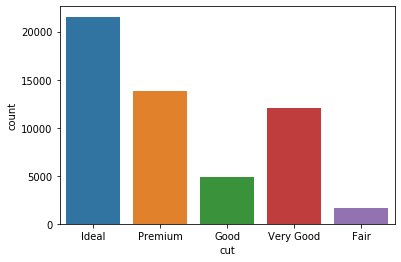

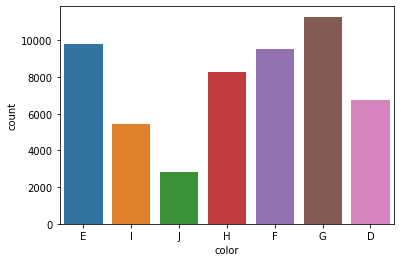

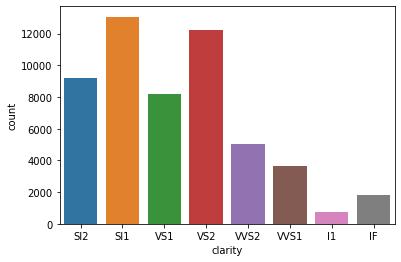

In [13]:
for i in d_cat:
    sns.countplot(x=i, data=d_cat)
    plt.show()

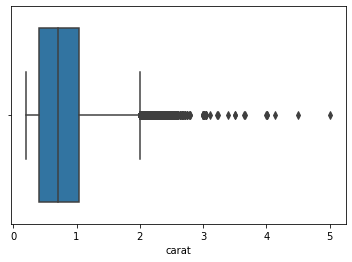

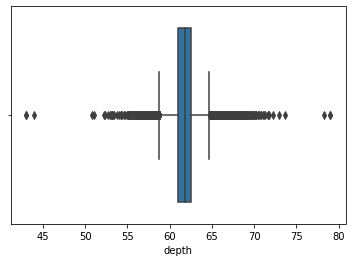

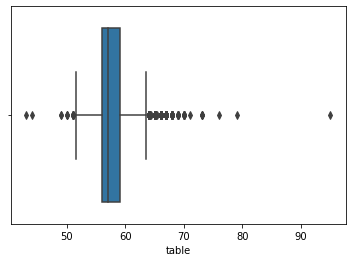

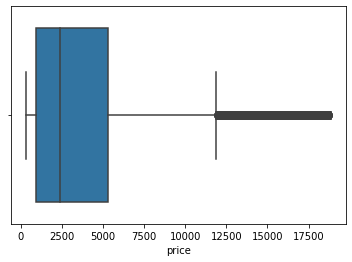

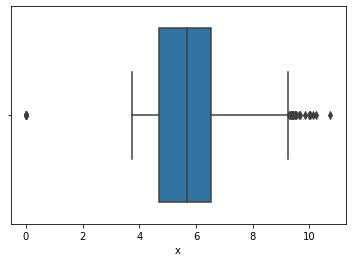

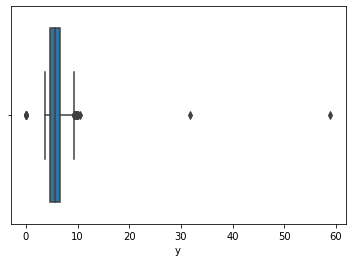

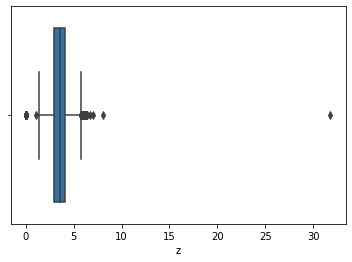

In [14]:
for i in d_num:
    sns.boxplot(x=i, data=d_num)
    plt.show()

From the above graph we can see that there are many outliers present in our data, thus outlier treatment is necessary,
but here, the target variable is Price and as we are predicting price of diamonds, then extreme values are possible, depending about the dimentions of the diamonds.

In [15]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [16]:
# encoding categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
diamonds['cut'] = le.fit_transform(diamonds['cut'])
diamonds['color'] = le.fit_transform(diamonds['color'])
diamonds['clarity'] = le.fit_transform(diamonds['clarity'])

In [17]:
diamonds.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

**Splitting the data into train and test**

In [18]:
# Splitting the data into dependent and independent variables
X=diamonds.drop('price', 1)
y=diamonds['price']
    
# Splitting into test and train data (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print('X_train size :',X_train.shape)
print('X_test size :',X_test.shape)
print('y_train size :',y_train.shape)
print('y_test size :',y_test.shape)

X_train size : (37758, 9)
X_test size : (16182, 9)
y_train size : (37758,)
y_test size : (16182,)


**Feature Scaling** To scale the independent features so that all the values can be in a comparable range

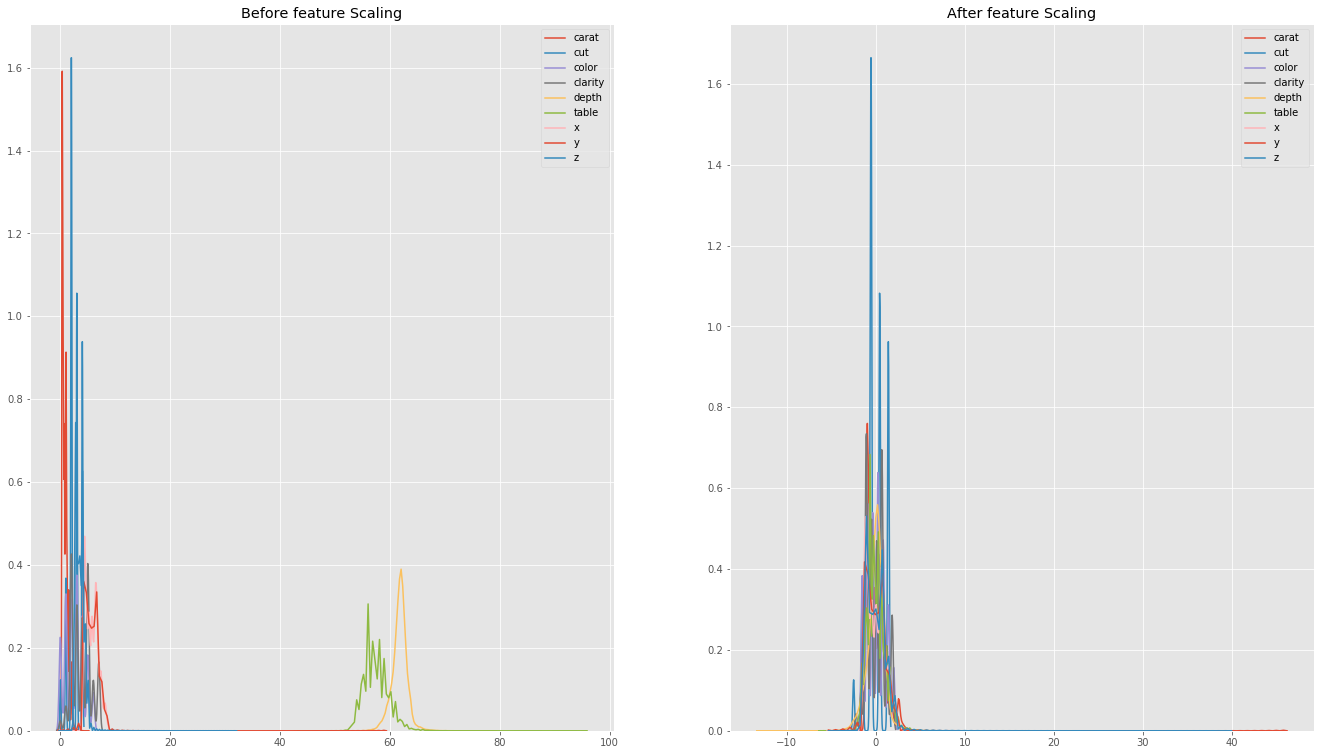

In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
    
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_train)
scaled_df = pd.DataFrame(scaled_df, columns=X_train.columns)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(23,13))

ax1.set_title('Before feature Scaling')
for i in X_train:
        sns.kdeplot(X_train[i], ax=ax1)
                    
ax2.set_title('After feature Scaling')
for i in scaled_df:
    sns.kdeplot(scaled_df[i], ax=ax2)
    
plt.show()

**Now we can see that the values of all independent variables lie in a comparable range**

**Now our data is ready to fit into regression model**

In [20]:
# defining a function for regression model

# building and training the model with train data, using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f'R^2 score for Train using sklearn: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for Test using sklearn: {lin_reg.score(X_test, y_test)}')
    
# building and training the model with train data, using statsmodels
import statsmodels.api as sm
X_constant = sm.add_constant(X_train)
model = sm.OLS(y_train,X_constant).fit()
model.summary()
print( '\nR^2 for Train using stasmodels:',model.rsquared)
print( 'AdjR^2 for Train using stasmodels :',model.rsquared_adj)
    
# building and training the model with test data, using statsmodels
import statsmodels.api as sm
X_constant = sm.add_constant(X_test)
model = sm.OLS(y_test,X_constant).fit()
model.summary()
print( '\nR^2 for Test using stasmodels :',model.rsquared)
print( 'AdjR^2 for Test using stasmodels :',model.rsquared_adj)
    
# Value of MAE and RMSE
from sklearn import metrics
y_pred_test = model.predict(sm.add_constant(X_test))
y_pred_train = model.predict(sm.add_constant(X_train))
print("\nMean Absolute Error for Train:", metrics.mean_absolute_error(y_pred_train,y_train))
print("Mean Absolute Error for Test:", metrics.mean_absolute_error(y_pred_test,y_test))
print("Root Mean Squared Error for Train:",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Root Mean Squared Error for Test:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    
    
#prediction(data=diamonds, target_variable='price', split_size=0.3)

R^2 score for Train using sklearn: 0.8838780842365068
R^2 score for Test using sklearn: 0.8878187588744918

R^2 for Train using stasmodels: 0.8838780842365068
AdjR^2 for Train using stasmodels : 0.8838503980745414

R^2 for Test using stasmodels : 0.8890711794566113
AdjR^2 for Test using stasmodels : 0.8890094456336525

Mean Absolute Error for Train: 861.8491742348707
Mean Absolute Error for Test: 837.1968486723196
Root Mean Squared Error for Train: 1474.7318089823427
Root Mean Squared Error for Test: 1304.4645018702902


**Now, comparing the original and predicted values**

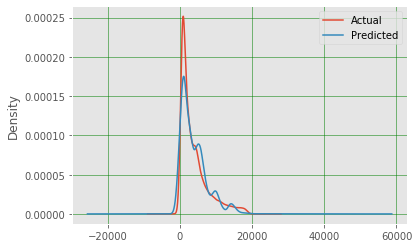

In [21]:
df1 = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred_test.ravel()})
df1.plot(kind='kde')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**Here we see that the prediction is not that accurate, so we will now perform further analysis to make our model more accurate**

### Constructing residual Plot

In [22]:
import statsmodels.stats.api as sms

predictions = model.predict(X_constant)
residuals = model.resid

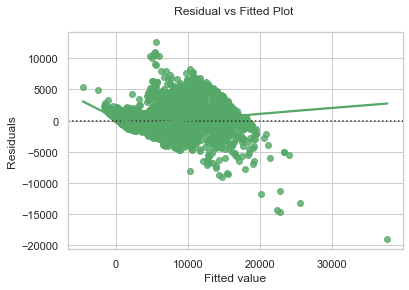

In [23]:
sns.set(style = 'whitegrid')
ax = sns.residplot(predictions, residuals, lowess=True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

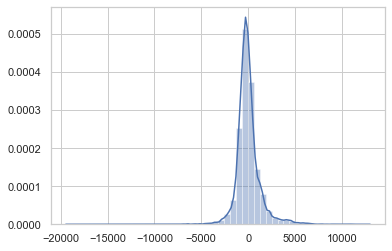

In [24]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)
plt.show()

**If the residual plot is normal then directly compute the R2 value, no need for transformation. If it is not normal then go for transformation. As, here the residual plot is not perfectly normal, so we will go for transformation**

In [25]:
# Splitting the data into log(dependent) and independent variables
X=diamonds.drop('price', 1)
y=diamonds['price']
y=y.transform(lambda X: np.log(X))
    
# Splitting into test and train data (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print('X_train size :',X_train.shape)
print('X_test size :',X_test.shape)
print('y_train size :',y_train.shape)
print('y_test size :',y_test.shape)

X_train size : (37758, 9)
X_test size : (16182, 9)
y_train size : (37758,)
y_test size : (16182,)


In [26]:
# defining a function for regression model

# building and training the model with train data, using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f'R^2 score for Train using sklearn: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for Test using sklearn: {lin_reg.score(X_test, y_test)}')
    
# building and training the model with train data, using statsmodels
import statsmodels.api as sm
X_constant = sm.add_constant(X_train)
model = sm.OLS(y_train,X_constant).fit()
model.summary()
print( '\nR^2 for Train using stasmodels:',model.rsquared)
print( 'AdjR^2 for Train using stasmodels :',model.rsquared_adj)
    
# building and training the model with test data, using statsmodels
import statsmodels.api as sm
X_constant = sm.add_constant(X_test)
model = sm.OLS(y_test,X_constant).fit()
model.summary()
print( '\nR^2 for Test using stasmodels :',model.rsquared)
print( 'AdjR^2 for Test using stasmodels :',model.rsquared_adj)
    
# Value of MAE and RMSE
from sklearn import metrics
y_pred_test = model.predict(sm.add_constant(X_test))
y_pred_train = model.predict(sm.add_constant(X_train))
print("\nMean Absolute Error for Train:", metrics.mean_absolute_error(y_pred_train,y_train))
print("Mean Absolute Error for Test:", metrics.mean_absolute_error(y_pred_test,y_test))
print("Root Mean Squared Error for Train:",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Root Mean Squared Error for Test:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    
print(model.summary())
#prediction(data=diamonds, target_variable='price', split_size=0.3)

R^2 score for Train using sklearn: 0.9429412683958371
R^2 score for Test using sklearn: 0.9523151748378427

R^2 for Train using stasmodels: 0.9429412683958371
AdjR^2 for Train using stasmodels : 0.9429276642688784

R^2 for Test using stasmodels : 0.9545497536628308
AdjR^2 for Test using stasmodels : 0.9545244598082033

Mean Absolute Error for Train: 0.1621375112076489
Mean Absolute Error for Test: 0.15694764425714236
Root Mean Squared Error for Train: 0.32614951129379
Root Mean Squared Error for Test: 0.2138739075939379
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 3.774e+04
Date:                Mon, 06 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:17:22   Log-Likelihood:                 1997.3


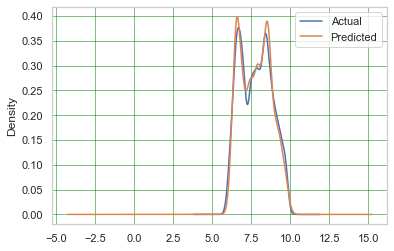

In [27]:
df1 = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred_test.ravel()})
df1.plot(kind='kde')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**Now we can see that our prediction accuracy has gone up**

### Checking the Asumptions of Linear Regression

For Linear Regression, we need to check if the 5 major assumptions hold.

1. No Auto correlation
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity
5. No strong MultiCollinearity


##### Assumption 1- No autocorrelation

1) No Auto correlation. 


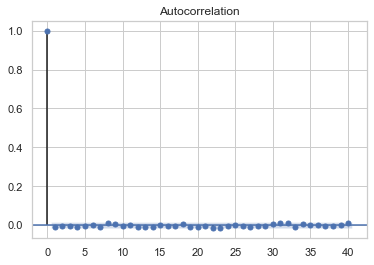

In [28]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()

##### Assumption 2- Normality of Residuals

2) The second assumption is the Normality of Residuals / Error terms.


In [29]:
from scipy import stats
print(stats.jarque_bera(model.resid))

(3969153.534887739, 0.0)


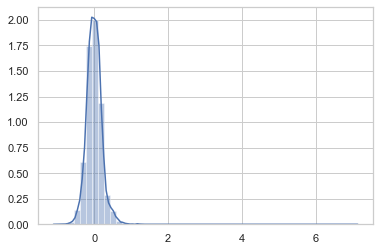

In [30]:
import seaborn as sns

sns.distplot(model.resid)
plt.show()

The Jarque Bera test shows the JB value and the p-value for the hypothesis testing.
As, we can see from the second warning of OLS model itself that Multicollinearity is present in the dataset.
It can also be stated by noting the high conditional number.

##### Asssumption 3 - Linearity of residuals


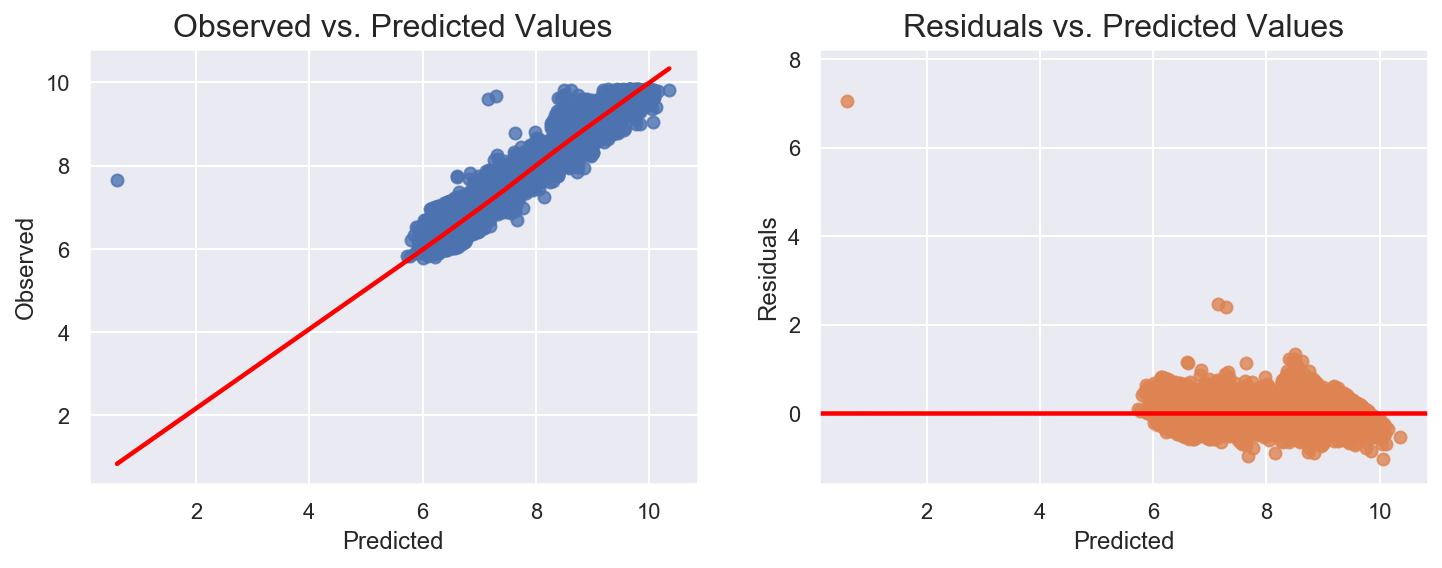

In [31]:
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (12,4)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, ax=ax[0], lowess=True, line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model=model, y=y_test)  

To detect nonlinearity one can inspect plots of observed vs. predicted values or residuals vs. predicted values. 
The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or 
around horizontal line in the latter one. 
In both cases linearity of residuals can be seen.

##### Rainbow test 
It is done to check the linearity of the residuals for a linear regression model.
Linearity of residuals is preferred.

In [32]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=model, frac=0.5)

(1.218275995447202, 3.6797527602173963e-19)

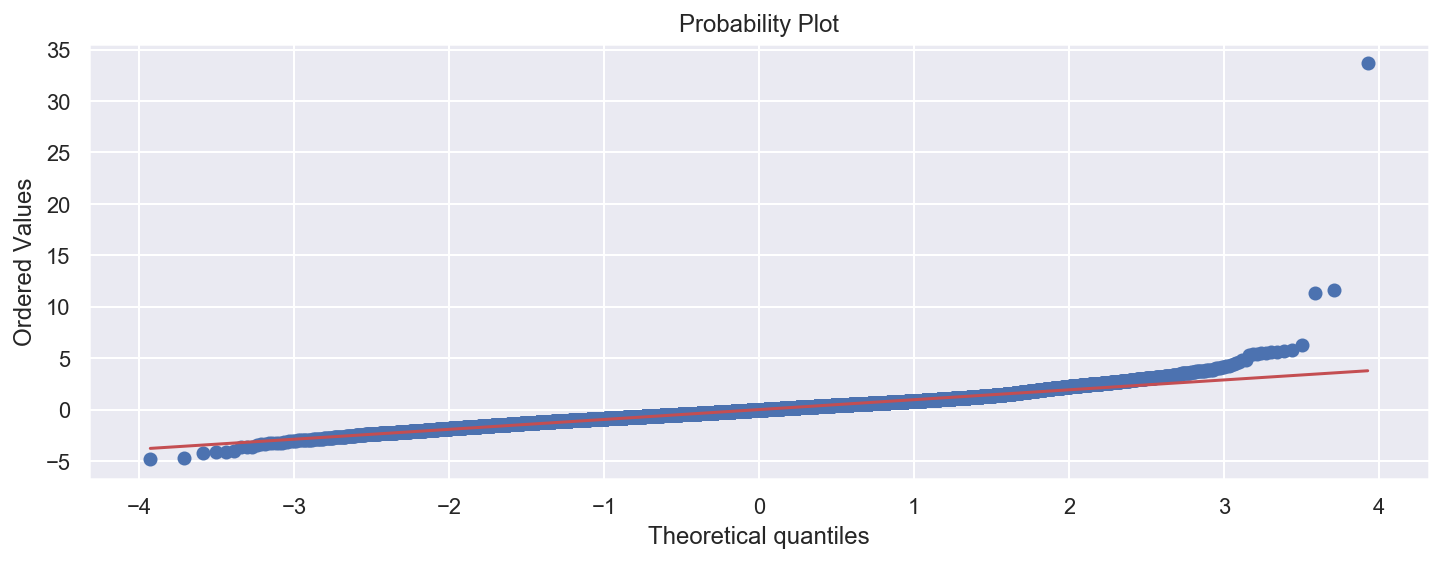

In [33]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = model.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [34]:
##### Mean value of the residuals should be zero
model.resid.mean()

-2.7022973869432683e-15

It is close to zero, so linearity is present.

##### Assumption 4 -  Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)

##### Goldfeld Test

[('F statistic', 0.8643805934624555), ('p-value', 0.9999999999707656)]

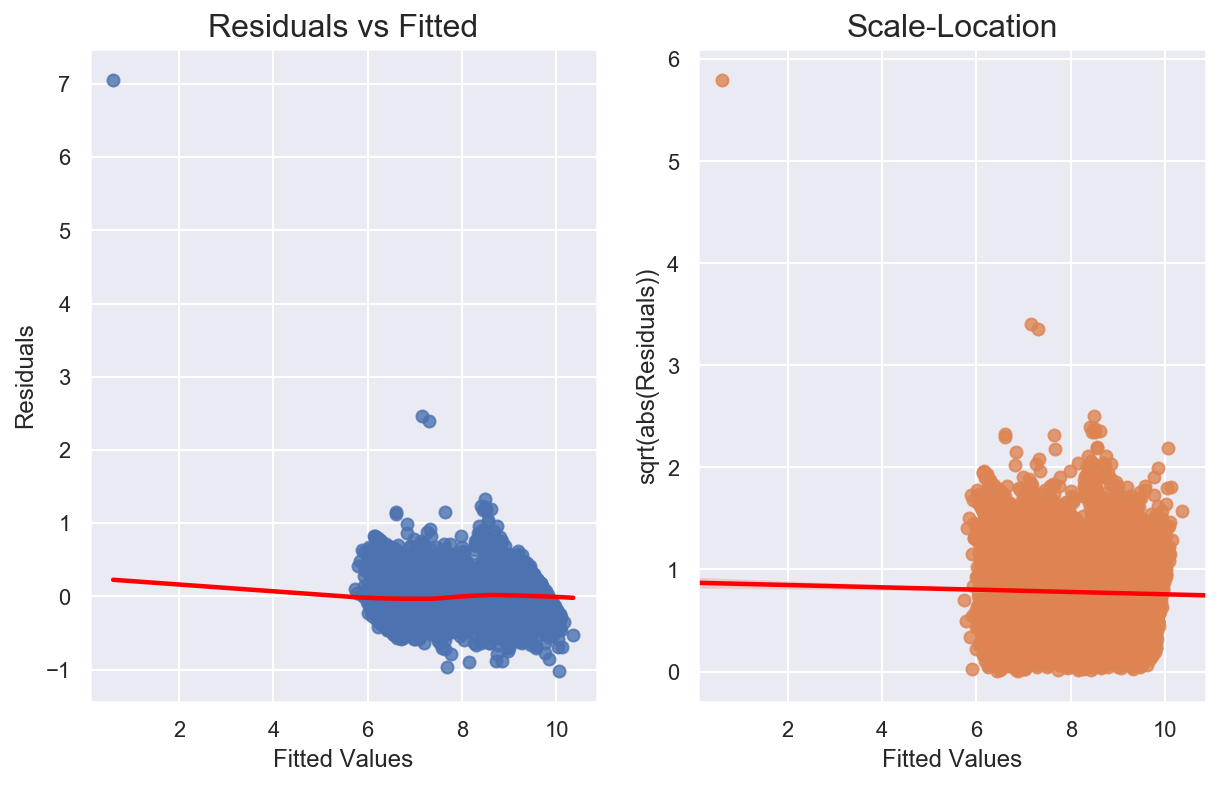

In [32]:
from statsmodels.compat import lzip
from statsmodels.compat import lzip
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.mpl.rcParams['figure.figsize'] = (10, 6)

model = model
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, ax=ax[0], lowess=True, line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

Here, p value is greater than 0.05 so, it is not a homoscedastic distribution.

##### Assumption 5- NoMulticollinearity


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,carat,cut,color,clarity,depth,table,x,y,z
vif,24.579535,1.071702,1.102983,1.070591,2.34646,1.172574,425.313976,424.461612,69.991889


So, multicollinearity exists, thus we will build our model by removing 'x'

In [37]:
# Splitting the data into log(dependent) and independent variables
X=diamonds.drop(['price', 'x'], 1)
y=diamonds['price']
y=y.transform(lambda X: np.log(X))
    
# Splitting into test and train data (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print('X_train size :',X_train.shape)
print('X_test size :',X_test.shape)
print('y_train size :',y_train.shape)
print('y_test size :',y_test.shape)

X_train size : (37758, 8)
X_test size : (16182, 8)
y_train size : (37758,)
y_test size : (16182,)


In [38]:
# defining a function for regression model

# building and training the model with train data, using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f'R^2 score for Train using sklearn: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for Test using sklearn: {lin_reg.score(X_test, y_test)}')
    
# building and training the model with train data, using statsmodels
import statsmodels.api as sm
X_constant = sm.add_constant(X_train)
model = sm.OLS(y_train,X_constant).fit()
model.summary()
print( '\nR^2 for Train using stasmodels:',model.rsquared)
print( 'AdjR^2 for Train using stasmodels :',model.rsquared_adj)
    
# building and training the model with test data, using statsmodels
import statsmodels.api as sm
X_constant = sm.add_constant(X_test)
model = sm.OLS(y_test,X_constant).fit()
model.summary()
print( '\nR^2 for Test using stasmodels :',model.rsquared)
print( 'AdjR^2 for Test using stasmodels :',model.rsquared_adj)
    
# Value of MAE and RMSE
from sklearn import metrics
y_pred_test = model.predict(sm.add_constant(X_test))
y_pred_train = model.predict(sm.add_constant(X_train))
print("\nMean Absolute Error for Train:", metrics.mean_absolute_error(y_pred_train,y_train))
print("Mean Absolute Error for Test:", metrics.mean_absolute_error(y_pred_test,y_test))
print("Root Mean Squared Error for Train:",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Root Mean Squared Error for Test:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    
print(model.summary())
#prediction(data=diamonds, target_variable='price', split_size=0.3)

R^2 score for Train using sklearn: 0.9122036433622335
R^2 score for Test using sklearn: 0.9347732159132143

R^2 for Train using stasmodels: 0.9122036433622335
AdjR^2 for Train using stasmodels : 0.9121850370189369

R^2 for Test using stasmodels : 0.9539054690794107
AdjR^2 for Test using stasmodels : 0.953882668346871

Mean Absolute Error for Train: 0.16560970620894427
Mean Absolute Error for Test: 0.15929794640062567
Root Mean Squared Error for Train: 0.4234183350077922
Root Mean Squared Error for Test: 0.2153844688040092
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 4.184e+04
Date:                Thu, 02 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:52:48   Log-Likelihood:                 1883.

**There is not much difference in the Adjusted R^2, but RMSE is decreasing, thus we will leave the model as it is. As it is giving 95% accurate results**